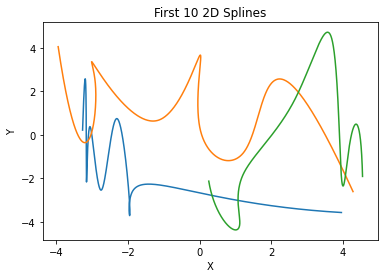

In [3]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def generate_random_points(num_points=10, min_limit=-5, max_limit=5):
    points = np.random.uniform(min_limit, max_limit, (num_points, 2))
    points = points[np.argsort(points[:, 0])]  # Sort points by x-coordinate
    return points

def create_2d_spline(points, num_timepoints=1000):
    x = points[:, 0]
    y = points[:, 1]
    
    cs_x = CubicSpline(np.arange(len(x)), x)
    cs_y = CubicSpline(np.arange(len(y)), y)
    
    t = np.linspace(0, len(x) - 1, num_timepoints)
    spline_x = cs_x(t)
    spline_y = cs_y(t)
    
    return np.column_stack((spline_x, spline_y))

def generate_2d_spline_dataset(num_splines=100):
    spline_dataset = []

    for _ in range(num_splines):
        points = generate_random_points()
        spline = create_2d_spline(points)
        spline_dataset.append(spline)

    return spline_dataset

spline_dataset = generate_2d_spline_dataset()

# Visualize the first 10 splines
for i in range(3):
    plt.plot(spline_dataset[i][:, 0], spline_dataset[i][:, 1])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('First 10 2D Splines')
plt.show()


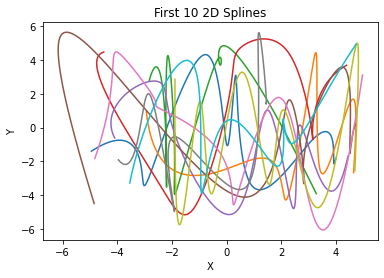

In [7]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def generate_random_points(num_points=10, min_limit=-5, max_limit=5):
    points = np.random.uniform(min_limit, max_limit, (num_points, 2))
    points = points[np.argsort(points[:, 0])]  # Sort points by x-coordinate
    return points

def create_2d_spline(points, num_timepoints=1000, kind='cubic'):
    t = np.arange(len(points))
    t_new = np.linspace(0, len(points) - 1, num_timepoints)

    interp_x = interp1d(t, points[:, 0], kind=kind)
    interp_y = interp1d(t, points[:, 1], kind=kind)
    
    spline_x = interp_x(t_new)
    spline_y = interp_y(t_new)
    
    return np.column_stack((spline_x, spline_y))

def generate_2d_spline_dataset(num_splines=100):
    spline_dataset = []

    for _ in range(num_splines):
        points = generate_random_points()
        spline = create_2d_spline(points)
        spline_dataset.append(spline)

    return spline_dataset

spline_dataset = generate_2d_spline_dataset()

# Visualize the first 10 splines
for i in range(10):
    plt.plot(spline_dataset[i][:, 0], spline_dataset[i][:, 1])

plt.xlabel('X')
plt.ylabel('Y')
plt.title('First 10 2D Splines')
plt.show()


In [8]:
import torch
from torch.utils.data import Dataset, DataLoader

class SplineDataset(Dataset):
    def __init__(self, num_splines=100):
        self.spline_data = generate_2d_spline_dataset(num_splines)

    def __len__(self):
        return len(self.spline_data)

    def __getitem__(self, idx):
        return torch.tensor(self.spline_data[idx], dtype=torch.float32)

# Create the SplineDataset with 100 2D splines
spline_dataset = SplineDataset(100)

# Create a PyTorch DataLoader with the custom SplineDataset
spline_dataloader = DataLoader(spline_dataset, batch_size=8, shuffle=True)

# Iterate over the DataLoader
for batch_idx, spline_batch in enumerate(spline_dataloader):
    print(f'Batch {batch_idx + 1}: shape {spline_batch.shape}')


Batch 1: shape torch.Size([8, 1000, 2])
Batch 2: shape torch.Size([8, 1000, 2])
Batch 3: shape torch.Size([8, 1000, 2])
Batch 4: shape torch.Size([8, 1000, 2])
Batch 5: shape torch.Size([8, 1000, 2])
Batch 6: shape torch.Size([8, 1000, 2])
Batch 7: shape torch.Size([8, 1000, 2])
Batch 8: shape torch.Size([8, 1000, 2])
Batch 9: shape torch.Size([8, 1000, 2])
Batch 10: shape torch.Size([8, 1000, 2])
Batch 11: shape torch.Size([8, 1000, 2])
Batch 12: shape torch.Size([8, 1000, 2])
Batch 13: shape torch.Size([4, 1000, 2])


TypeError: 'DataLoader' object is not subscriptable